In [1]:
import pandas as pd

# Load the dataset
file_path = 'Dataset .csv'
data = pd.read_csv(r'C:\Users\text0\AppData\Local\Programs\Microsoft VS Code\Dataset .csv')

# Display the first few rows of the dataset
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Selecting relevant features for classification
features = ['Restaurant ID', 'Country Code', 'City', 'Longitude', 'Latitude', 'Average Cost for two', 'Price range', 'Votes']
X = data[features]
y = data['Cuisines']

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')

# Handling missing values in the target variable
y = y.fillna('Unknown')

# Encoding categorical variables
label_encoders = {}
categorical_features = ['Country Code', 'City']

for feature in categorical_features:
    label_encoders[feature] = LabelEncoder()
    X[feature] = label_encoders[feature].fit_transform(X[feature])

# Encoding the target variable
y = y.apply(lambda x: x.split(', ')[0])  # Simplify by taking the first cuisine listed
label_encoders['Cuisines'] = LabelEncoder()
y = label_encoders['Cuisines'].fit_transform(y)

# Handle missing values in the features
X = pd.DataFrame(imputer.fit_transform(X), columns=features)

# Display the first few rows of the preprocessed dataset
X.head()


C:\Users\text0\AppData\Local\Temp\ipykernel_1320\60125452.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoders[feature].fit_transform(X[feature])
C:\Users\text0\AppData\Local\Temp\ipykernel_1320\60125452.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = label_encoders[feature].fit_transform(X[feature])


,Restaurant ID,Country Code,City,Longitude,Latitude,Average Cost for two,Price range,Votes
0,6317637.0,6.0,73.0,121.027535,14.565443,1100.0,3.0,314.0
1,6304287.0,6.0,73.0,121.014101,14.553708,1200.0,3.0,591.0
2,6300002.0,6.0,75.0,121.056831,14.581404,4000.0,4.0,270.0
3,6318506.0,6.0,75.0,121.056475,14.585318,1500.0,4.0,365.0
4,6314302.0,6.0,75.0,121.057508,14.584450,1500.0,4.0,229.0


In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7640, 8), (1911, 8), (7640,), (1911,))

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Build a pipeline for preprocessing and classification
pipeline = Pipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import numpy as np

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

# Get the unique classes in both y_test and y_pred
unique_classes_test = np.unique(y_test)
unique_classes_pred = np.unique(y_pred)
unique_classes = np.union1d(unique_classes_test, unique_classes_pred)
target_names = label_encoders['Cuisines'].inverse_transform(unique_classes)

print("\nClassification Report:\n", classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names, zero_division=0))


Accuracy: 0.3270538984824699
Precision: 0.2641926446561843
Recall: 0.3270538984824699

Classification Report:
                  precision    recall  f1-score   support

        Afghani       0.00      0.00      0.00         0
       American       0.27      0.35      0.30        46
         Andhra       1.00      1.00      1.00         1
          Asian       0.11      0.08      0.09        13
       Assamese       0.00      0.00      0.00         0
            BBQ       0.00      0.00      0.00         3
         Bakery       0.22      0.17      0.19       112
       Bar Food       0.00      0.00      0.00         5
        Bengali       0.00      0.00      0.00         3
      Beverages       0.25      0.11      0.15        19
         Bihari       0.00      0.00      0.00         1
        Biryani       0.00      0.00      0.00        18
      Brazilian       0.33      0.67      0.44         3
      Breakfast       0.00      0.00      0.00         8
        British       0.00      0

In [7]:
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd

# Get the unique classes in both y_test and y_pred
unique_classes_test = np.unique(y_test)
unique_classes_pred = np.unique(y_pred)
unique_classes = np.union1d(unique_classes_test, unique_classes_pred)
target_names = label_encoders['Cuisines'].inverse_transform(unique_classes)

# Generate the classification report
cuisine_performance = classification_report(y_test, y_pred, labels=unique_classes, target_names=target_names, output_dict=True, zero_division=0)

# Convert the classification report to a DataFrame
cuisine_performance_df = pd.DataFrame(cuisine_performance).transpose()

# Display the DataFrame
cuisine_performance_df


,precision,recall,f1-score,support
Afghani,0.000000,0.000000,0.000000,0.000000
American,0.271186,0.347826,0.304762,46.000000
Andhra,1.000000,1.000000,1.000000,1.000000
Asian,0.111111,0.076923,0.090909,13.000000
Assamese,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...
Western,0.000000,0.000000,0.000000,0.000000
World Cuisine,0.000000,0.000000,0.000000,1.000000
accuracy,0.327054,0.327054,0.327054,0.327054
macro avg,0.101133,0.089101,0.088884,1911.000000


In [8]:
### Segment 1: Split the Data

from sklearn.model_selection import train_test_split

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
### Segment 2: Train and Evaluate the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
import pandas as pd

# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=2000, random_state=42)

In [11]:
# Train the model
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)


c:\Users\text0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# Evaluate the model's performance
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted', zero_division=0)
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted', zero_division=0)

In [13]:
print("Logistic Regression:")
print(f"Accuracy: {accuracy_logistic}")
print(f"Precision: {precision_logistic}")
print(f"Recall: {recall_logistic}")


Logistic Regression:
Accuracy: 0.25610607117934403
Precision: 0.10180364932097875
Recall: 0.25610607117934403


In [15]:
# Generate the classification report
cuisine_performance_logistic = classification_report(y_test, y_pred_logistic, labels=unique_classes, target_names=target_names, output_dict=True, zero_division=0)
cuisine_performance_df_logistic = pd.DataFrame(cuisine_performance_logistic).transpose()

In [16]:
### Segment 3: Train and Evaluate the Random Forest Model

from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)


In [17]:
# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)

In [18]:
print("Random Forest:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")

Random Forest:
Accuracy: 0.316817864619679
Precision: 0.26006954666292287
Recall: 0.316817864619679


In [19]:
# Generate the classification report
cuisine_performance_rf = classification_report(y_test, y_pred_rf, labels=unique_classes, target_names=target_names, output_dict=True, zero_division=0)
cuisine_performance_df_rf = pd.DataFrame(cuisine_performance_rf).transpose()

In [20]:
### Segment 4: Compare the Results and Plot

import matplotlib.pyplot as plt

# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Logistic Regression': [accuracy_logistic, precision_logistic, recall_logistic],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf]
})

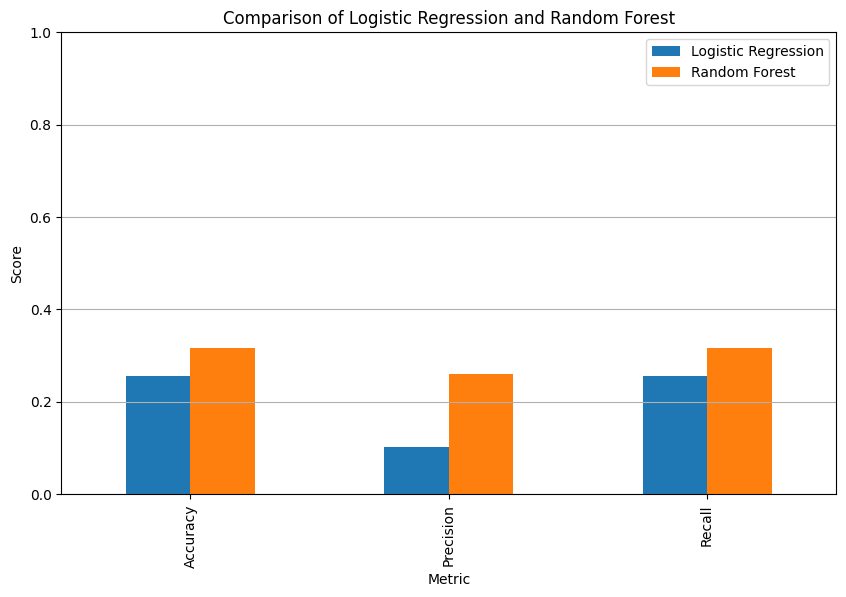

In [21]:
# Plot the comparison
comparison_df.set_index('Metric').plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Logistic Regression and Random Forest')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()

In [22]:
# Show the detailed performance for both models
print("Logistic Regression Classification Report:")
print(cuisine_performance_df_logistic)
print("\nRandom Forest Classification Report:")
print(cuisine_performance_df_rf)


Logistic Regression Classification Report:
               precision    recall  f1-score  support
Afghani         0.000000  0.000000  0.000000      2.0
American        0.000000  0.000000  0.000000     81.0
Andhra          0.000000  0.000000  0.000000      2.0
Asian           0.000000  0.000000  0.000000     20.0
Assamese        0.000000  0.000000  0.000000      0.0
...                  ...       ...       ...      ...
Western         0.000000  0.000000  0.000000      0.0
World Cuisine   0.000000  0.000000  0.000000      1.0
micro avg       0.256106  0.256733  0.256419   2859.0
macro avg       0.004696  0.009337  0.005130   2859.0
weighted avg    0.102053  0.256733  0.139194   2859.0

[91 rows x 4 columns]

Random Forest Classification Report:
               precision    recall  f1-score  support
Afghani         0.000000  0.000000  0.000000      2.0
American        0.242105  0.283951  0.261364     81.0
Andhra          0.000000  0.000000  0.000000      2.0
Asian           0.058824  0.0500